<h1 style="color:#008B8B">Почему “1.5” в методе обнаружения выбросов IQR?</h1>
https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

Стандартный вопрос, который возникает при построении графика QQ-plot: Почему в 1,5 раза больше IQR? Почему не 1 или 2 или любое другое число?

**IQR-метод обнаружения выбросов**
Чтобы легко объяснить метод IQR, давайте начнем с квадратного графика.

<img src="img/1_1.png" width="600" height="360">

Коробочный график более или менее говорит нам о распределении данных. Это дает представление о том, насколько на самом деле распространены данные, каков их диапазон и какова их асимметрия. Как вы могли заметить на рисунке, прямоугольная диаграмма позволяет нам сделать вывод из нее для упорядоченных данных, то есть она говорит нам о различных метриках данных, расположенных в порядке возрастания.

На приведенном выше рисунке: 
* **Minimum** - это минимальное значение в наборе данных
* **Maximum** - максимальное значение в наборе данных.

Таким образом, разница между ними говорит нам о диапазоне набора данных.
* Медиана-это середина (или центральная точка), также называемая вторым квартилем данных (возникающая из-за того, что данные упорядочены).
* **Q1**-это первый квартиль данных, то есть, скажем, 25% данных лежит между минимумом и Q1.
* **Q3**-это третий квартиль данных, то есть 75% данных лежит между минимумом и Q3.

Разница между 3-им и 1 квартал называется **межквартильным диапазоном (Inter-Quartile Range)** или **IQR**.

Чтобы обнаружить выбросы с помощью этого метода, мы определяем новый диапазон, назовем его диапазоном принятия решений, и любая точка данных, лежащая за пределами этого диапазона, рассматривается как выброс и соответственно рассматривается. Диапазон приведен ниже:

`Lower Bound: (Q1 - 1.5 * IQR)`

`Upper Bound: (Q3 + 1.5 * IQR)`

Любая точка данных меньше Нижней границы или больше Верхней границы рассматривается как выброс.

**Но вопрос был: почему только в 1,5 раза больше IQR? Почему не любой другой номер?**

Ну, как вы уже могли догадаться, число (здесь 1,5, далее шкала) явно управляет чувствительностью диапазона и, следовательно, решающим правилом. При большем масштабе выброс(ы) будет рассматриваться как точка(ы) данных, в то время как при меньшем масштабе некоторые точки данных будут восприниматься как выброс(ы). И мы совершенно уверены, что ни один из этих случаев не является желательным.

**Гауссовское распределение:**

* Около 68,26% всех данных лежит в пределах одного стандартного отклонения (<σ) от среднего (μ), принимая во внимание обе стороны розовой области на рисунке.

* Около 95,44% всех данных лежат в пределах двух стандартных отклонений (2σ) от среднего (μ), принимая во внимание обе стороны, розовую+синюю область на рисунке.

* Около 99,72% всех данных лежат в пределах трех стандартных отклонений (<3σ) от среднего (μ), принимая во внимание обе стороны, розовую+синюю+зеленую область на рисунке.

* А остальные 0,28% всех данных лежат за пределами трех стандартных отклонений (>3σ) от среднего (μ), принимая во внимание обе стороны, маленькую красную область на рисунке. И эта часть данных рассматривается как выбросы.

* Первый и третий квартили, Q1 и Q3, лежат на -0,675 σ и +0,675 σ от среднего значения соответственно.

Так как между первым и вторым квартилем данных лежит ровно 50% данных. Так как значение Q1 - это определённое стандарнтое отклонение, слева от которого находится 25% данных. Оно стоставлен -0,675σ, то есть, если посмотреть в z-таблицу мы сможем определить какое количество наблюдений будет лежать слева от 0,675 стандартных отклонений.

#### Давайте рассчитаем диапазон решения IQR с точки зрения σ

**Taking scale = 1:**

Lower Bound:

`= Q1 - 1 * IQR
= Q1 - 1 * (Q3 - Q1)
= -0.675σ - 1 * (0.675 - [-0.675])σ
= -0.675σ - 1 * 1.35σ
= -2.025σ`

Upper Bound:

`= Q3 + 1 * IQR
= Q3 + 1 * (Q3 - Q1)
= 0.675σ + 1 * (0.675 - [-0.675])σ
= 0.675σ + 1 * 1.35σ
= 2.025σ`

Таким образом, если шкала принята за 1, то в соответствии с методом IQR любые данные, которые лежат за пределами 2,025σ от среднего значения (μ) с любой стороны, должны рассматриваться как выбросы. Но, как мы знаем, до 3σ по обе стороны от μ данные полезны. Таким образом, мы не можем принять scale = 1, потому что это делает диапазон решений слишком эксклюзивным, что приводит к слишком большим выбросам. Другими словами, диапазон решений становится настолько маленьким (по сравнению с 3σ), что некоторые точки данных рассматриваются как выбросы, что нежелательно.

**Taking scale = 2:**

Lower Bound:

`= Q1 - 2 * IQR
= Q1 - 2 * (Q3 - Q1)
= -0.675σ - 2 * (0.675 - [-0.675])σ
= -0.675σ - 2 * 1.35σ
= -3.375σ`

Upper Bound:

`= Q3 + 2 * IQR
= Q3 + 2 * (Q3 - Q1)
= 0.675σ + 2 * (0.675 - [-0.675])σ
= 0.675σ + 2 * 1.35σ
= 3.375σ`

Таким образом, если шкала принята равной 2, то в соответствии с методом IQR любые данные, которые лежат за пределами 3,375σ от среднего (μ) с любой стороны, должны рассматриваться как выбросы. Но, как мы знаем, до 3σ по обе стороны от μ данные полезны. Таким образом, мы не можем взять scale = 2, потому что это делает диапазон решений слишком всеобъемлющим, что приводит к слишком малому количеству выбросов. Другими словами, диапазон решений становится настолько большим (по сравнению с 3σ), что некоторые выбросы рассматриваются как точки данных, что тоже нежелательно.

**Taking scale = 1.5:**

Lower Bound:

`= Q1 - 1.5 * IQR
= Q1 - 1.5 * (Q3 - Q1)
= -0.675σ - 1.5 * (0.675 - [-0.675])σ
= -0.675σ - 1.5 * 1.35σ
= -2.7σ`

Upper Bound:

`= Q3 + 1.5 * IQR
= Q3 + 1.5 * (Q3 - Q1)
= 0.675σ + 1.5 * (0.675 - [-0.675])σ
= 0.675σ + 1.5 * 1.35σ
= 2.7σ`

Если масштаб принимается равным 1,5, то в соответствии с методом IQR любые данные, выходящие за пределы 2,7σ от среднего (μ) с любой стороны, должны рассматриваться как выбросы. И этот диапазон решений наиболее близок к тому, что нам говорит распределение по Гауссу, то есть 3σ. Другими словами, это делает правило принятия решения наиболее близким к тому, что учитывает распределение Гаусса для обнаружения выбросов, и это именно то, что мы хотели.

**Дополнительно:**

Чтобы получить точно 3σ, нам нужно взять масштаб = 1,7, но тогда 1,5 будет более «симметричным», чем 1,7, и мы всегда были немного более склонны к симметрии, не так ли !?

Кроме того, IQR-метод обнаружения выбросов - не единственный и определенно не лучший метод обнаружения выбросов, поэтому небольшой компромисс является понятным и приемлемым.

---
**Заметки сумашедшего:**

Таблица **z-значений** нормального распределения. Как её интерпретировать?

Насколько я понял, вроде правильно, это таблица  p-значений.

p-значение– это вероятность нахождения в данном "куске" нормального распределения.

Пример. На графике по оси X у нас идет Z-шкала. Берем из таблицы значение Z=0.0, ему соответствует p=0.5. т.е. с вероятностью в 50% мы будем видеть в нашей выборке особей у которых Z>0.0 (т.е. больше-меньше среднеарифметической особи). Что логично.

Берем из таблицы значение Z=1.04, ему соответствует p=0.1492. т.е с вероятностью в 14.9% мы будем видеть в нашей выборке особей у которых Z>1.04 (т.е. наше Z-значение уже больше одной сигмы и вероятность встретить таких особей значительно меньше стала).

Когда p-значение является очень маленьким, это означает, что это очень маловероятно (маленькая вероятность).

___

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
from math import sqrt

%matplotlib inline
%config InlineBackend.figure_format = 'png'
rcParams['figure.figsize'] = 6, 4

sns.set(style='darkgrid')
sns.set(font_scale=1.5)

<h1 style="color:black" align="center">1. Введение</h1>

<h1 style="color:black" align="center">1.2 Генеральная совокупность</h1>

<h1 style="color:#008B8B">Основные термины</h1>

**Генеральной совокупностью** называют всё исследуемое множество.

**Выборкой** называется совокупность случайно отобранныз объекторв из генеральной совокупности (ГС)

Выборка должна быть **репрезентативной** (представительной), то есть её объекты должны достаточно хоршо отражать свойства ГС.

<h1 style="color:#008B8B">Виды выборок</h1>

**Простая случайная выборка (simple random sample)** - Случайным образом выбираем элементы ГС;

**Стратифицированная выборка (stratified sample)** - Перед извлечением элементов ГС для исследования, мы разделяем ГС на несколько различных страт. Если мы хотим, чтобы в исследовании равновероятно приняли участие мужчина и женщина, мы сначала разделим ГС по признаку пола, а после используя метод "случайной выборки" из каждой страты выбираем элементы для исследования.

**Групповая выборка (cluster sample)** - Изначально производим разделение ГС на группы (считаем, что группы практически не отличаются) и выбираем несколько групп из которых случайным образом формируем выборку.

<h1 style="color:black" align="center">1.3 Типы переменных</h1>

1. Количественные
    1. Непрерывные - рост на промежутке от 160 до 170;
    2. Дискретные - число детей в семье;
    
2. Номинативные (качественные) - разделение на группы (женщина или мужчина).

3. Ранговые. 1-е место занял Саша, 2-е место занял Том - Значения можно только сравнить, нельзя сказать насколько или во сколько 1-й сильнее 5-го). 

<h1 style="color:black" align="center">1.4 Меры центральной тенденции</h1>

<h1 style="color:#008B8B">Свойства среднего значения</h1>

Если к каждому значению прибавить число, то среднее значение увеличится на это число:

$\large \mu_{x + c} 
= 
\frac{\sum_{i=1}^n (x_i + c)}{n} 
= 
\frac{\sum_{i=1}^n x_i}{n} + \frac{\sum_{i=1}^n c}{n} 
= 
\mu_x + \frac{nc}{n} 
= 
\mu_x + c$

Если каждое значение умножить на некоторое число, то и среднее значение увеличится на это число:

$\large \mu_{x \cdot c} 
=
\frac{\sum_{i=1}^n x_i \cdot c}{n}
=
\frac{c \sum_{i=1}^n x_i}{n}
=
\mu_x \cdot c$ 

Сумма отклонений от среднего равна нулю:

$\large \sum\limits_{i=1}^n x_i - \mu_x 
=
n \mu_x - n \mu_x 
= 
0$

<h1 style="color:black" align="center">1.5 Меры изменчивости</h1>

<h1 style="color:#008B8B">Меры изменчивости</h1>

**Размах (Range)** - разность максимального и минимального значения:

$\large R = X_{max} - X_{min}$

Недостаток: при добавлении большого числа, размах резко изменит значение.

**Дисперсия (variance)** - Средний квадрат отклонений индивидуальных значений признака от их средней велечины.

$\large D = \frac{1}{n} \sum\limits_{i=1}^n (x_i - \mu_x)^2$

Возращаемся к исходным еденицам измерения: 

$\large \sigma = \sqrt{D}$ - **Среднеквадратичное отклонение**

$\large \text{sd} = \sqrt{D}$ - **Стандартное отклонение** (Необходимо при рассчёте дисперсии делить на $n-1$)


<h1 style="color:#008B8B">Свойства дисперсии</h1>

**Добавление числа**

$\large D_{x + c} = D_x$ 

$\large \text{sd}_{x + c} = \text{sd}_x$

Добавление числа только сещает распределение в сторону, но не меняет форму его распределения, поэтому значение отсаётся неизменным.

**Умножение на чисо**

$\large D_{x \cdot c} = D_x \cdot c^2$ 

Умножение каждого значения на константу увеличит изменчивость данных (хвосты распределения станут лежать в более широком диапозоне). 

$\large \text{sd}_{x \cdot c} = \text{sd}_x \cdot c$

Значит и $\text{sd}$ увеличится в константу раз. Тогда $D$ увеличится в квадрат, так как $\text{sd} = \sqrt{D}$ соответственно $\text{sd}^2 = D$.

<h1 style="color:black" align="center">1.7 Нормальное распределение</h1>
<h1 style="color:#008B8B">Стандартизация</h1>

Стандартизация или z-преобразование - преобразование полученных данных в стандартную z-шкалу (Z-score) со средним $M_z = 0$ и $D_z = 1$

Для преобразования данных в Z-шкалу, используется формула следующего вида:

$\large z_i = \frac{x_i - \mu}{\sigma}$

### Как работает формула?

В числителе стоит $x_i - \mu$. Вспоминаем свойство среднего, если из каждого наблюдения вычесть некоторое число, то и из самого среднего значения необходимо вычесть это число. Следовательно, $x_i - \mu = \mu - \mu = 0$.

Запишем формулу z-преобразования в следующем виде:

$\large z_i = \frac{x_i - \mu}{\sigma} = (x_i - \mu) \frac{1}{\sigma}$

В новой формуле, мы умножаем $\frac{1}{\sigma}$ на $x_i - \mu$ столько раз, сколько у нас наблюдений, так как преобразование производится для каждого выборочного элемента, значит, от каждого надо отнять среднее ($x_i - \mu$) и умножить его на ($\frac{1}{\sigma}$). Если мы каждое значение умножаем на некоторое число, то по свойству среднего значения, среднее тоже необходимо умножить на это число. Но среднее значение равняется нулую, поэтому умножение на него не оказывает влияние.

А что происходит с дисперсией? По свойству дисперсии, если каждое значение умножить на некоторое чилсло, то дисперсию необходимо умножить на квадрат этого числа:

$\large D \cdot \big(\frac{1}{\sigma}\big)^2$

Но что есть квадрат стандартного отклонения ? По определению это и есть дисперсия

$\large D \cdot \big(\frac{1}{\sigma}\big)^2 = D \cdot \frac{1}{D} = 1$

Сокращаем и получаем, что дисперсия равна 1.

<h1 style="color:#008B8B">Практическое применение стандартизации</h1>

z - преобразование часто используется, чтобы все наблюдения перевести в z - шкалу (M = 0, sd = 1) для упрощения работы с данными. Однако иногда нам необходимо рассчитать z - значение только для отдельно взятого наблюдения, чтоб выяснить насколько далеко оно отклоняется от среднего значения в единицах стандартного отклонения.

z-преобразование позволяет нам ответить на вопрос "Какой процент наблюдений лежит в абсолютно любом интересующем нас диапозоне". **Например**, в некоторой выборке, среднее значение равняется $\bar{x} = 150$, а стандартное отклонение равно $\text{sd} = 8$. Какой процент наблюдений превосходит значение $154$. Выполняем z-преобразование:

$\large z_{154} = \frac{154-150}{8} = 0.5$

Воспользуемся специальной таблицой, где в диапозоне превышающем 154 (0.5) находится 30% наблюдений или вероятность встретить значение превосходящее 0.5, составляет 0.3.

<h3 style="color:#2E8B57">Задача № 1</h3>

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15). Какой приблизительно процент людей обладает IQ > 125?

<h4 align='center'>Решение:</h4>

In [7]:
from scipy import stats

mean = 100
std = 15
IQ=125
# sf - Survival function = (1 - cdf) - Cumulative distribution function
print(f"Только у {(stats.norm(mean, std).sf(IQ))*100:.2f}% людей, IQ>{IQ}")

Только у 4.78% людей, IQ>125


### Иммитация доски Гальтона в коде

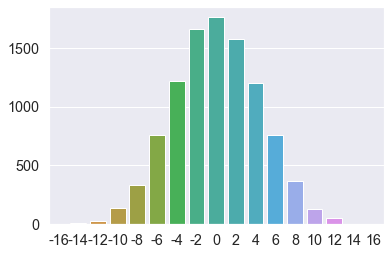

In [8]:
sns.set(font_scale=1.3)

data = dict()
# количество шариков
N = 10000
# количество уровней
level = 20
for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1])
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x=list(data.keys()), y=list(data.values()));

<h1 style="color:black" align="center">1.8 Центральная предельная теорема</h1>

Central Limit Theorem for Means
https://gallery.shinyapps.io/CLT_mean/

<h1 style="color:#008B8B">Создадим нормлаьное распределение с использованием Numpy</h1>

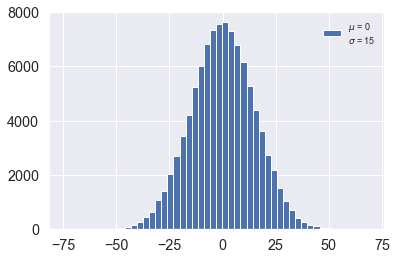

In [9]:
mu, sigma = 0, 15
s = np.random.normal(mu, sigma, 100000)

plt.hist(s, bins=50, label = f'$\mu$ = {mu} \n$\sigma$ = {sigma}')
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.show()

Допустим, некоторый признак распределён нормально в ГС и имеет среднее значение равное 0 и стандартное отклонение равное 15. 
Давайте будем многократно извлекать выборки из ГС по 35 наблюдений в каждой и внутри каждой из выборок рассчитывать среднее значение и стандартное отклонение

**Визуализируем первые 6 выборок:**

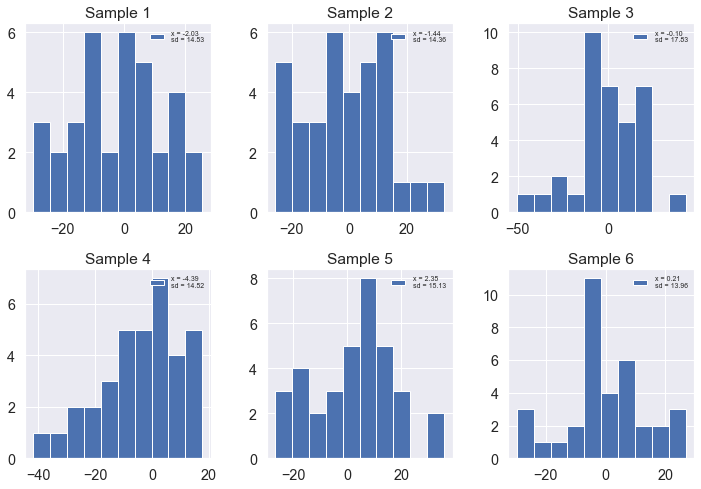

In [10]:
selections_mean = np.array([])

# Создаём выборку
selections = np.random.choice(s, (200, 35))

#  Создаем "Figure" и "Axes":
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Выпрямляем axes, для удобного обращения
axes = axes.flatten()

# Проходим циклом по кажой выборке
for number_axes, selection in enumerate(selections):
    
    if number_axes < 6: # Строим первые 6 графиков
        
        # Строим гистограмму
        axes[number_axes].hist(selection, label = f' x = {selection.mean():.2f} \n sd = {selection.std():.2f}')

        # Настройка легенды
        axes[number_axes].legend(loc='upper right', fontsize=7, frameon=False)

        # Добавление заголовков
        axes[number_axes].set(title = f'Sample {number_axes + 1}')

        # Задаём значение ширины и высоты фигуры в дюймах
        fig.set_size_inches(12, 8)

        # Увеличение ширины фигуры 
        # 0.3 - это не дюймы, а доля от среднего значения горизонтальных осей графиков
        # wspace - начинаится с буквы W, так как это сокращение от width (Ширина) Отвечает за растояние между графиками по горизонатли
        plt.subplots_adjust(wspace=0.3, hspace=0.30)
    
    # Сохранение результатов в массив
    selections_mean = np.append(selections_mean, [selection.mean()])
    
plt.show()

Рассчитаем среднее значение внутри каждой из выборок (это уже сделано в переменной selections_mean) и построим распределение выборочных средних значений:

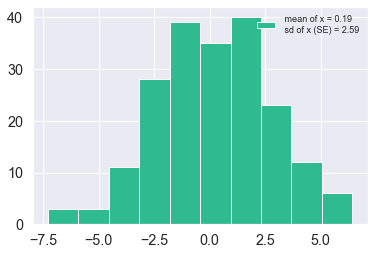

In [11]:
plt.hist(selections_mean, color='#30ba8f',label = f' mean of x = {selections_mean.mean():.2f} \n sd of x (SE) = {selections_mean.std():.2f}')
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.show()

Если внутри каждой из выборок оценка реального показателя может быть не столь точной, то в среднем выборочные средние значения предоставят хороший показатель и среднее всех средних будет очень близко к среднему в ГС. На гистограмме мы видим, что большенство всех наших выборочных средних лежат рядом с нулём и какие-то отклоняются в положительную сторону и в отрицательную.

Стандартное отклонение данного распределения называется стандартной ошибкой среднего и показывает на сколько в среднем выборочные значения отклоняются от среднего ГС (от среднего средних, так как оно имеет близкое значение к ГС, можно считать среднее средних - средним ГС).

**Что если увеличить объём каждой из выборок?**
Распределение признака в выборках станет напоминать картину из ГС (множество выборок вторая гистограмма). Выборочные оценки станут тоже более точными. Если мы посмотрим на выборочное распределение средних значений (зелёная гистограмма), то стандартная ошибка уменьшится, так как большинство всех выборочных наблюдений будут лежать близко с реальным показателем (средним ГС).

<h1 style="color:#008B8B">Сформулируем центральную предельную теорему</h1>

Предположим исследуемый нами признак имеет нормальное распределение в ГС с некоторым средним значением и стандартным отклонением (самая первая гистограмма). Мы многократно извлекаем выборки равные $n$ по объёму и в каждой выборке рассчитываем среднее значение, после чего строим распределение этих выборочных средних (зелёная гистограмма). Такое распределение будет будет являеться нормальным со средним, которое практически совпадает со средним ГС. И данное распределение будет иметь стандартное отклонение (стандартную ошибку среднего), которая рассчитывается следующим образом: стандартное отклонение признаков в ГС разделённое на корень из числа наблюдений в выборке.

$\large se = \frac{\sigma}{\sqrt{n}}$

Данный показатель можно рассчитать как стандартное отклонение средних значений или воспользоваться центральной предельной теоремой, значение которой, будет практически идентично:

In [5]:
se = sigma / sqrt(35)
se

2.53546276418555

Чем больше наблюдений в нашей выборке, тем ближе все выборочные средние к среднему ГС, поэтому изменчивость всех выборочных средних будет тем меньше, чем больше элементов в нашей выборке. Так же чем меньше изменчивость исследуемого признака в ГС, тем реже будут возникать сильные отклонения выборочных средних от среднего в ГС.

Следовательно, чем больше число наблюдений в выборке, чем меньше изменчивость исследуемого признака, тем меньше будет стандартная ошибка выборочных средних.

**Использование теоремы для одной выборки** Если выполняются следующие условия: число наблюдений в выборке больше 30, эта выборка представляет собой репрезентативную выборку, то мы можем найти стандартную ошибку следующим образом: В качестве стандартного отклонения ГС использовать стандартное отклонение нашей выборки, для оценки этого параметра.

$\large se = \frac{sd}{\sqrt{n}}$

Сформируем случайную выборку и проверим данное утверждение:

In [85]:
one_sample = np.random.choice(s, 35)
se = one_sample.std(ddof=1) / sqrt(35)
print(se)

2.5826593208729793


Даже при небольшом объёме выборки мы получаем близку стандартную ошибку среднего. Основываясь только на данных одной выборки, мы можем предположить, как бы вели себя все выборочные средние, если бы мы многократно повторяли это исследование. Все выборочные средние распределились вокруг среднего ГС (среднего всех средних) с стандартным отклонением, которое равняется ~2.53

## Центральная предельная теорема для равномерного распределения

А что произойдет, если признак в генеральной совокупности будет распределен ненормально? Допустим, это будет равномерное распределение?

Вот это поворот! Оказывается и в такой ситуации, распределение выборочных средних тоже окажется близким к нормальному. Это вынуждает нас значительно дополнить определение ЦПТ, которая сформулирована в прошлом шаге.

Можно сказать, что ЦПТ - это значительно более сильное по смыслу утверждение:
Пусть есть признак, распределенный КАК  УГОДНО* с некоторым средним и некоторым стандартным отклонением. Тогда, если мы будем выбирать из этой совокупности выборки объема n, то их средние тоже будут распределены нормально со средним равным среднему признака в ГС и стандартным отклонением, se, формулу которого мы уже приводили в прошлых шагах.

Это довольно важное замечание, так как на практике мы часто сталкиваемся с признаками, у которых распределение ненормальное, но это не означает, что мы не можем проверять статистические гипотезы в таком случае. Не смотря на то, что сам признак распределен ненормальным образом!

* определенные ограничения на распределение все-таки накладываются, например, распределение должно обладать конечной дисперсией, да и так бывает, бывают распределения, у которых дисперсия и вовсе не определена!


**Замечание:** Просто взять и подставить выборочное стандартное отклонение - весьма грубое упрощение, которым не пользуются на практике. А как надо, описано во втором модуле.

<h1 style="color:black" align="center">1.9 Доверительный интервал</h1>

<h1 style="color:#008B8B">Для чего нужен доверитлеьный интервал?</h1>

Целью статистики является возможность сделать выводы относительно ГС, основываясь только на выборочных данных. Очень часто, исследователя интересует, чему равно среднее значение исследуемого признака во всей ГС. 

**Пример**: Уровень экспрессии некоторого гена измерялся у мужчин и женщин в возрасте от 18 до 30 лет. Ниже представлены результаты 64 наблюдений.

In [24]:
data = np.array([102, 91, 99, 100, 103, 98, 99, 101, 106, 88, 103, 97, 103, 101, 101, 91, 104, 105, 105, 
                 100, 101, 91, 99, 98, 107, 102, 100, 97, 98, 104, 100, 98, 102, 99, 95, 103, 104, 97, 
                 99, 102, 98, 107, 101, 93, 98, 101, 93, 91, 107, 102, 96, 93, 100, 105, 103, 107, 99, 
                 102, 106, 102, 94, 104, 103, 102,])

std_data = data.std(ddof=1) 
mean_data = data.mean()
count_data = len(data)

Исследователей интересует, чему равен средний показатель экспрессии гена в ГС, а не в выборке (в выборке он равен 100). ГС являются все мужчины и женщины в указанном возрастном промежутке и пригласить всех этих людей является сложной задачей. 

Мы не сможем точно определить среднее ГС, но мы можем рассчитать такой интервал, относительно которого мы можем быть уверены в том, что он включает в себя среднее ГС.

Вспомним свойства нормального распределения и ЦПТ. Если бы мы многократно повторяли наш эксперемент, то все выборочные средние распределились бы нормальным образом, вокруг среднего ГС со стандартным отклонение (стандартной ошибкой среднего), которая равняется $se = \frac{sd}{\sqrt{n}}$. Мы так же знаем, что 95% всех выборочных средних лежали бы в диапозоне $\mu \pm 1.96 \sigma$. Но у нас выборочное средне, поэтому мы говорим о стандартной ошибке среднего $\mu \pm 1.96 se$.

Предположим, мы рассчитываем доверительный интервал для каждого выборочного среднего (каждый цвет отражает среднее). Зелёный, красный и чёрный интервал включает в себя среднее ГС:

<img src="img/1_2.png" width="600" height="360">

Таким, образом 95% выборочных средних включили бы в себя среднее ГС, если бы мы рассчитывали данный интервал. И только те выборочные срдение, которые достаточно далеко отклонились от среднего ГС (x4), не включили бы в свой 95% доверительный интервал среднее ГС. 

**Вывод:** Если бы многократно извлекали выборки одинкового размера из ГС, в каждой выборке рассчитывали среднее значение и для него свой 95% доверительный интервал ($\bar{x} \pm 1.96 se$), то в 95% всех случаев, такой интервал включал бы в себя срденее ГС. Мы можем быть на 95% уверены, что он включает в себя срденее ГС.

**Рассчитаем такой интервал для нашего примера:**

In [88]:
se = std_data / sqrt(count_data)
se

0.5563486402641868

Для рассчёта нам необходимо найти левую и правую границу, а центром будет выступать выборочное среднее. 

In [89]:
left = mean_data - 1.96 * se
right = mean_data + 1.96 * se

print(f'{left:.2f} |----{mean_data}----| {right:.2f}')

98.91 |----100.0----| 101.09


**99% доверительный интервал:** Если 95% всех наблюдений в нормлаьном распределении находятся в диапозоне $\mu \pm 1.96\sigma$.То 99% лежат в диапозоне $\mu \pm 2.58\sigma$, такой интервал будет более широкий и мы можем быть более уверены, что срденее входит в данный доверительный интервал.

<h3 style="color:#2E8B57">Задача № 1</h3>

Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?

<h4 align='center'>Решение:</h4>

 - <font color='crimson'>Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.</font>
 - <font color='green'>Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.</font>
 - <font color='green'>Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.</font>
 - <font color='crimson'>Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.</font>
 - <font color='crimson'>Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.</font>

### Почему 1.96 se?

Возьмём $\pm 2 se$. Используя таблицу Z-значний, найдем, с какой вероятность можно встретить значение не превосходящее $2se$. Используя Z-тбалицу мы получаем вероятность равную $0.9772$, то есть, $97.72%$ выборочных средних будут лежать слева от $2se$. А вероятность встретить значение превосходящее $2se$ составляет $1 - 0.9772 = 0.0228$, то есть, $2.28%$ выборочных средних будут лежать за справа от $2se$.

Но мы хотим знать, а какой процент наблюдений лежит в пределе $\pm 2se$, для этого из всё площади под кривой вычитаем хвосты для $-2se$ и для $2se$. Получаем $1 - 0.0228 \cdot 2 = 0.9544$ вероятность встретить выборочные средние в пределах $\pm 2se$.

Нам необходимо именно 95% выборочных средних, найдём такую сигму. Для этого нам необходимо найти такое значение, где между $x se$ будет лежать 95% выборочных срдених, а это есть $1.96se$. Находится аналогично, как и для $2 se$. 

Данные рассчёты справедливы для стандартного отклонения, так как стандартная ошибка срденего - это и есть стандартное отклонение выборочных средних.

In [25]:
'''Вычисление 1.96 c помощью scipy'''
from scipy import stats

# 95%
p = 0.95
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf) 
print(f'{stats.norm().isf(alpha):.2f} sigma')

1.96 sigma


<h3 style="color:#2E8B57">Задача № 2</h3>

Рассчитайте 99% доверительный интервал для следующего примера:  среднее = 10, стандартное отклонение = 5, размер выборки = 100

<h4 align='center'>Решение:</h4>

In [27]:
from numpy import sqrt
from scipy import stats

p = 0.99
mean = 10
std = 5
n = 100

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonfidence_interval = mean - sigma*se, mean + sigma*se
print('[%.2f; %.2f]' % сonfidence_interval)

[8.71; 11.29]


<h1 style="color:black" align="center">1.10 Идея статистического вывода, p-уровень значимости</h1>

Distribution Calculator - Адрес сайта, используемого для расчета p - уровня значимости:

https://vavilovva.shinyapps.io/dist_calc/

<h1 style="color:#008B8B">Формирование гипотез</h1>

Предположим, нам известно, что на выздоровление при некотором заболевании в среднем требуется $\mu = 20$ дней. Однако, мы разработали новый препорат и хотим проверить, можно ли сократить время выздоравления. Мы собрали выборку из $n = 64$ пациентов и опробывали на них новый метод лечения, оказалось что средний срок выздоравления сократился до $\bar{x} = 18.5$ дней при стандартном отклонении равном $sd = 4$. 

Данный результат мог быть получен совершенно случайно, давайте проверим это. **Сформируем необходимые гипотезы:**

$H_0: \mu_\text{новый препорат} = 20$ - Никакого воздействия препорат не оказывает и среднее значение в ГС тех пациентов, кто использует новый препорат, не отличается от 20.

$H_1: \mu_\text{новый препорат} \ne 20$ - Альтернативная гипотеза гворит о том, что препорат оказывает влияние на выздоровление, и что среднее значение скорости выздоравления тех, кто принимает данный препорат не равнятся 20.

Предположим, что на самом деле верна нулевая гипотеза. Тогда мы знаем, что в соответствии с ЦПТ, если бы мы многократно повторяли наше исследование, то выборочные средние распределились бы нормльным образом, вокруг среднего ГС ($\mu = 20$) и со стандартной ошибкой среднего равной:

$\large se = \frac{4}{\sqrt{64}} = 0.5$

Насколько далеко наше выборочное среднее отклонилось от предпологаемого среднего в ГС в еденицах стандартного отклонения. Для этого необходимо сделать Z-преобразование:

$\large z_{18.5} = \frac{18.5 - 20}{0.5} = -3$

Это означает, что если в ГС среднее значение на самом деле равнялось 20, то наше выборочное среднее отклонилось бы от среднего ГС на $-3 \sigma$ в левую сторону.

**Рассчёт вероятности:** Воспользуемся свойствами нормлаьного распределения и рассчитаем вероятность такого (-3) или ещё более выраженного отклонения от среднего значения. Рассчитаем это значение с использование Python:

In [11]:
from scipy import stats

2*(stats.norm.cdf(-3))

0.0026997960632601866

Вероятность отклониться от среднего больше чем на 3 стандартных отклонения составляет 0.0027. На первом этапе мы предположили, что верна нулевая гипотеза. Чем меньше p-value тем больше у исследователя оснований отклонить нулевую гипотезу, считается если p-value меньше чем 0.05, тогда можно принимать альтернативную гипотезу.

**Заметка:** Зачем рассчитывать вероятность отклонения в другую сторону? Если мы проверяли гипотизу о том, что препорат ускорит скорость выздоровления, зачем учитывать веротяность того, что он её понизит, причём с таким большим отклонением в другую сторону? Так как вероятность - это площадь под кривой и если мы будем рассматривать только одно отклонение, тогда вероятность данного события будет меньше, поэтому в статистики учитываются оба конца распределения. Ведь мы не знаем в какую сторону мы получим отклонения от среднего. 

Иногда используется односторонний критерий тогда, когда отклонение в одну из сторон попросту невозможно, что бывает довольно редко.

### Ошибки статистического вывода:

`1-го рода` - отклонили нулевую гипотезу, когда она оказалась верной.

`2-го рода` - не отклонили нулевую гипотезу, когда верна альтернативная.

<h3 style="color:#2E8B57">Задача № 1</h3>

Укажите, какие утверждения относительно p-уровня значимости являются верными.  Правильными могут быть все утверждения, некоторые, одно, а может не быть вообще.

<h4 align='center'>Решение:</h4>

* Т.к. в нашем исследовании p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза (новый препарат не влияет на скорость выздоровления) также равняется всего-лишь 0,003.

Возьмем монетку, подбросим ее 10 раз и все 10 раз выпал орёл. Вероятность такого события это $\frac{1}{2^{10}} = 0.0009765625$ - это не вероятность того, что монетка является честной и работает правильно. Это вероятность того, что если допустить то, что монетка работает правильно, вероятность такого события была бы $0.0009765625$.

Аналогично и с p-уровенем значимости. Если мы получили в эксперементе p-уровень значимости равный 0.05, это означает, что если верна нулевая гипотеза - вероятность получить такие или ещё более выраженные различия равняется 0.05.
 
* Если бы в исследовании мы получили p=0,9, это означало бы, что верна нулевая гипотеза, и новый препарат не влияет на скорость выздоровления.

Если p-уровень значимости оказался больше 0.05, какой вывод мы можем заключить? Это значит, что у нас недостаточно оснований для отклонения нулевой гипотезы. Если p-уровень значимости равен 0.3, это означает что наши данные хорошо согласуются с нулевой гипотезой. Это не означает что нулева гипотеза верна, тем более с вероятностью 70% или 30%. p-уровень значимости просто не позволяет нам отклонить нулевую гипотезу.

* Чем меньше p уровень значимости, тем сильнее получаемые различия. Например, если бы p уровень значимости в нашем исследовании был бы равен 0,0001, значит новый препарат еще сильнее бы влиял на скорость выздоровления.

p-уровень значимости ничего не сообщает о силе эффекта, о величичене различий. Можно получить довольно значимое различие, которое будет небольшим, а можно получить сокращение госпитализации на неделю, но абсолютно не значимое с точки зрения статистики.

* Статистически значимый результат, всегда означает ценный и осмысленный результат.

p-уровень значимости ничего не говорит о правильности, о ценности, о научности получаемых результатов. Статистика является только инструемнтом. Любую гипотезу можно подтвердить статистически - бесконечно долгим повтороением эксперемента до тех пор, пока случайно мы не получим статистически значимые различия.

* Вероятность случайно получить такие различия равняется 0,003.

* [Правильный вариант] Все утверждения выше неверны.

### Статья о интерпретации p-value

https://habr.com/ru/company/stepic/blog/250527/

<h3 style="color:#2E8B57">Задача № 2</h3>

В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

<h4 align='center'>Решение:</h4>

$\text{Изначальная выборка } \mu = 115$

$\text{Выборка 2015 года } \bar{X} = 118 \qquad N = 144 \qquad sd = 9$

**Сформируем необходимые гипотезы:**

$H_0: \mu_\text{2015} = 115$ - Нет различия в среднем балле учеников прошлых лет и учеников в 2015 году. Среднее значение в ГС тех учеников, кто проходил курс в 2015 году, не отличается от 115.

$H_1: \mu_\text{2015} \ne 115$ - Альтернативная гипотеза гворит о том, что средний балл учеников за 2015 год отличается от среднего балла в прошлых годах.

$\large se = \frac{sd}{\sqrt{N}} = \frac{9}{\sqrt{144}} = 0.75$

$\large z = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{N}}} = \frac{118-115}{0.75} = 4$

Это означает, что если в ГС среднее значение на самом деле равнялось 115, то наше выборочное среднее отклонилось бы от среднего ГС на $4 \sigma$ в правую сторону. Скорее всего, это выборочное среднее принадлежит другой генеральной совокупности, проверим наше предположение расчитав p-value:

In [29]:
from scipy import stats

2*(stats.norm.cdf(-4))

6.334248366623973e-05

На первом этапе мы предположили, что верна нулевая гипотеза. Так как p-value < 0.05, значит у нас достаточно основай чтобы отклонить нулевую гипотезу.